In [41]:
library(arules)
library(arulesViz)

data <- read.transactions("multibattery_token_filter.csv",
                           rm.duplicates = FALSE, 
                           format = "basket",  ##if you use "single" also use cols=c(1,2)
                           sep=",",  ## csv file
                           cols=1)
data

Warning message in asMethod(object):
"removing duplicated items in transactions"


transactions in sparse format with
 432 transactions (rows) and
 20 items (columns)

In [2]:
data <- data[1:20]

In [42]:
inspect(data)

      items                      transactionID
[1]   {battery, iphone}          apple        
[2]   {}                         battery      
[3]   {apple}                    best         
[4]   {}                         review       
[5]   {pro}                      apple        
[6]   {iphone}                   phone        
[7]   {pro}                      apple        
[8]   {}                         battery      
[9]   {}                         new          
[10]  {}                         u            
[11]  {}                         new          
[12]  {new}                      galaxy       
[13]  {iphone, pro}              apple        
[14]  {}                         pro          
[15]  {best, review}             pro          
[16]  {galaxy}                   samsung      
[17]  {galaxy}                   samsung      
[18]  {}                         review       
[19]  {battery, iphone}          apple        
[20]  {}                         apple        
[21]  {galaxy

In [29]:
rules <- apriori(data=data,parameter = list(supp=.001, conf=.001, minlen=2),
                     appearance = list(default="lhs", rhs="battery"),
                     control=list(verbose=FALSE))
# BeerRules <- sort(BeerRules, decreasing=TRUE, by="confidence")
inspect(rules)                                               

     lhs                  rhs       support     confidence coverage   
[1]  {speed}           => {battery} 0.004629630 0.66666667 0.006944444
[2]  {portable}        => {battery} 0.002314815 0.09090909 0.025462963
[3]  {market}          => {battery} 0.002314815 0.08333333 0.027777778
[4]  {ev}              => {battery} 0.002314815 0.07142857 0.032407407
[5]  {new}             => {battery} 0.002314815 0.08333333 0.027777778
[6]  {iphone}          => {battery} 0.018518519 0.61538462 0.030092593
[7]  {galaxy}          => {battery} 0.004629630 0.11111111 0.041666667
[8]  {power}           => {battery} 0.004629630 0.10526316 0.043981481
[9]  {portable, power} => {battery} 0.002314815 0.33333333 0.006944444
[10] {iphone, new}     => {battery} 0.002314815 1.00000000 0.002314815
     lift       count
[1]   9.2903226 2    
[2]   1.2668622 1    
[3]   1.1612903 1    
[4]   0.9953917 1    
[5]   1.1612903 1    
[6]   8.5756824 8    
[7]   1.5483871 2    
[8]   1.4668930 2    
[9]   4.6451613 1    

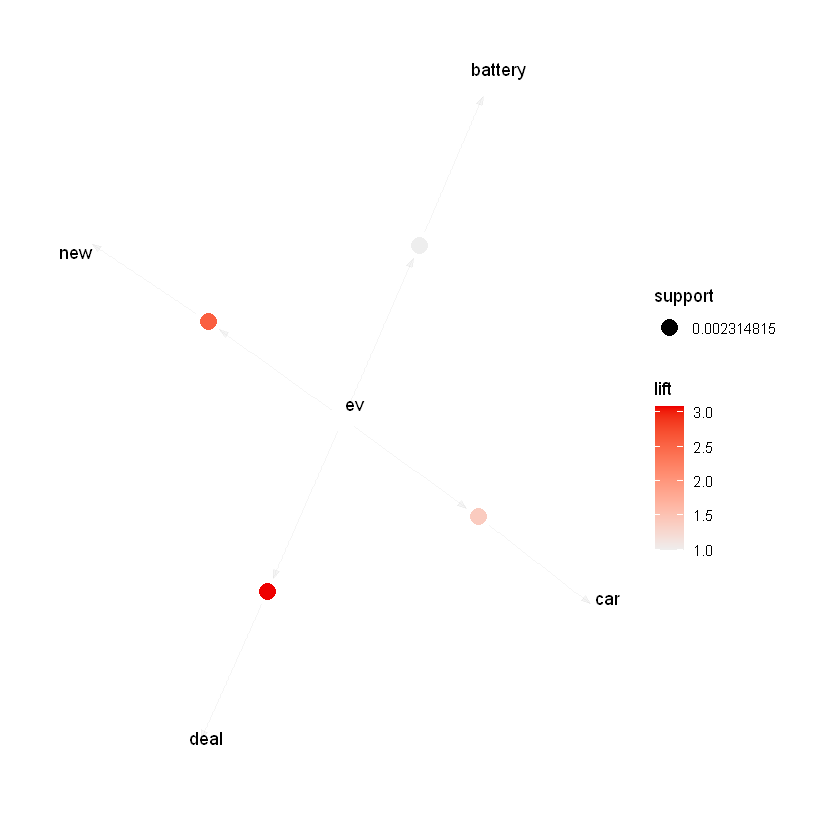

In [40]:
rules <- head(sort(rules, by="lift"))
plot(rules,method = "graph")  

In [30]:
conf_rules <- sort(rules, decreasing=TRUE, by="confidence")
inspect(conf_rules[1:10])     

     lhs                  rhs       support     confidence coverage   
[1]  {iphone, new}     => {battery} 0.002314815 1.00000000 0.002314815
[2]  {speed}           => {battery} 0.004629630 0.66666667 0.006944444
[3]  {iphone}          => {battery} 0.018518519 0.61538462 0.030092593
[4]  {portable, power} => {battery} 0.002314815 0.33333333 0.006944444
[5]  {galaxy}          => {battery} 0.004629630 0.11111111 0.041666667
[6]  {power}           => {battery} 0.004629630 0.10526316 0.043981481
[7]  {portable}        => {battery} 0.002314815 0.09090909 0.025462963
[8]  {market}          => {battery} 0.002314815 0.08333333 0.027777778
[9]  {new}             => {battery} 0.002314815 0.08333333 0.027777778
[10] {ev}              => {battery} 0.002314815 0.07142857 0.032407407
     lift       count
[1]  13.9354839 1    
[2]   9.2903226 2    
[3]   8.5756824 8    
[4]   4.6451613 1    
[5]   1.5483871 2    
[6]   1.4668930 2    
[7]   1.2668622 1    
[8]   1.1612903 1    
[9]   1.1612903 1    

In [31]:
lift_rules <- sort(rules, decreasing=TRUE, by="lift")
inspect(lift_rules[1:10])     

     lhs                  rhs       support     confidence coverage   
[1]  {iphone, new}     => {battery} 0.002314815 1.00000000 0.002314815
[2]  {speed}           => {battery} 0.004629630 0.66666667 0.006944444
[3]  {iphone}          => {battery} 0.018518519 0.61538462 0.030092593
[4]  {portable, power} => {battery} 0.002314815 0.33333333 0.006944444
[5]  {galaxy}          => {battery} 0.004629630 0.11111111 0.041666667
[6]  {power}           => {battery} 0.004629630 0.10526316 0.043981481
[7]  {portable}        => {battery} 0.002314815 0.09090909 0.025462963
[8]  {market}          => {battery} 0.002314815 0.08333333 0.027777778
[9]  {new}             => {battery} 0.002314815 0.08333333 0.027777778
[10] {ev}              => {battery} 0.002314815 0.07142857 0.032407407
     lift       count
[1]  13.9354839 1    
[2]   9.2903226 2    
[3]   8.5756824 8    
[4]   4.6451613 1    
[5]   1.5483871 2    
[6]   1.4668930 2    
[7]   1.2668622 1    
[8]   1.1612903 1    
[9]   1.1612903 1    

In [32]:
supp_rules <- sort(rules, decreasing=TRUE, by="support")
inspect(supp_rules[1:10])     

     lhs                  rhs       support     confidence coverage   
[1]  {iphone}          => {battery} 0.018518519 0.61538462 0.030092593
[2]  {speed}           => {battery} 0.004629630 0.66666667 0.006944444
[3]  {galaxy}          => {battery} 0.004629630 0.11111111 0.041666667
[4]  {power}           => {battery} 0.004629630 0.10526316 0.043981481
[5]  {portable}        => {battery} 0.002314815 0.09090909 0.025462963
[6]  {market}          => {battery} 0.002314815 0.08333333 0.027777778
[7]  {ev}              => {battery} 0.002314815 0.07142857 0.032407407
[8]  {new}             => {battery} 0.002314815 0.08333333 0.027777778
[9]  {portable, power} => {battery} 0.002314815 0.33333333 0.006944444
[10] {iphone, new}     => {battery} 0.002314815 1.00000000 0.002314815
     lift       count
[1]   8.5756824 8    
[2]   9.2903226 2    
[3]   1.5483871 2    
[4]   1.4668930 2    
[5]   1.2668622 1    
[6]   1.1612903 1    
[7]   0.9953917 1    
[8]   1.1612903 1    
[9]   4.6451613 1    

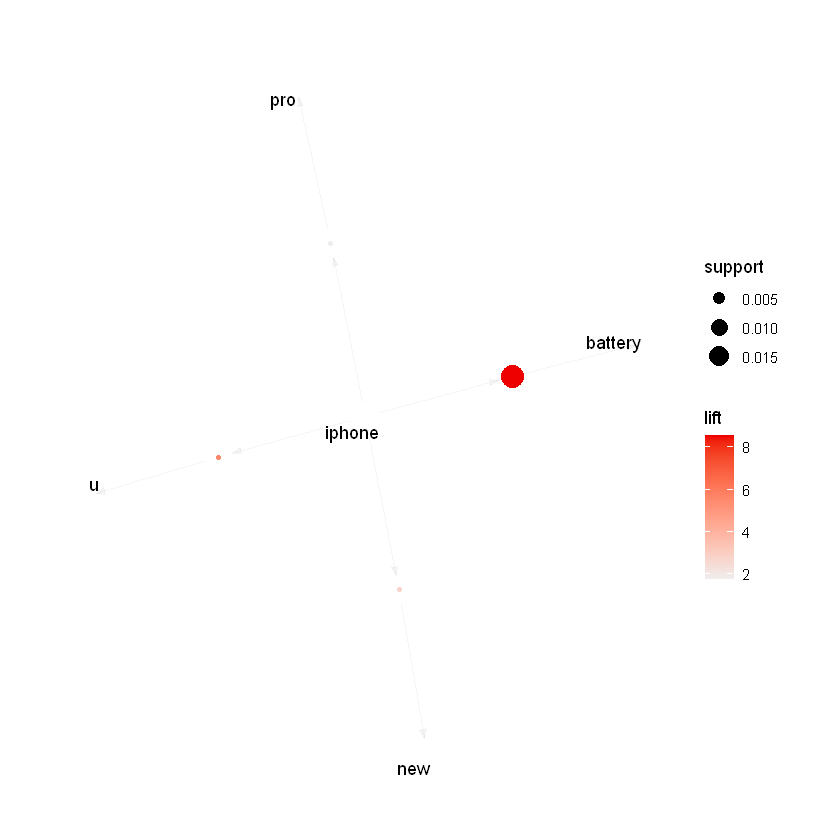

In [36]:
rules <- apriori(data=data,parameter = list(supp=.001, conf=.001, minlen=2),
                     appearance = list(default="rhs", lhs="iphone"),
                     control=list(verbose=FALSE))
subrules <- head(sort(rules, by="lift"))
plot(subrules,method = "graph")                                            

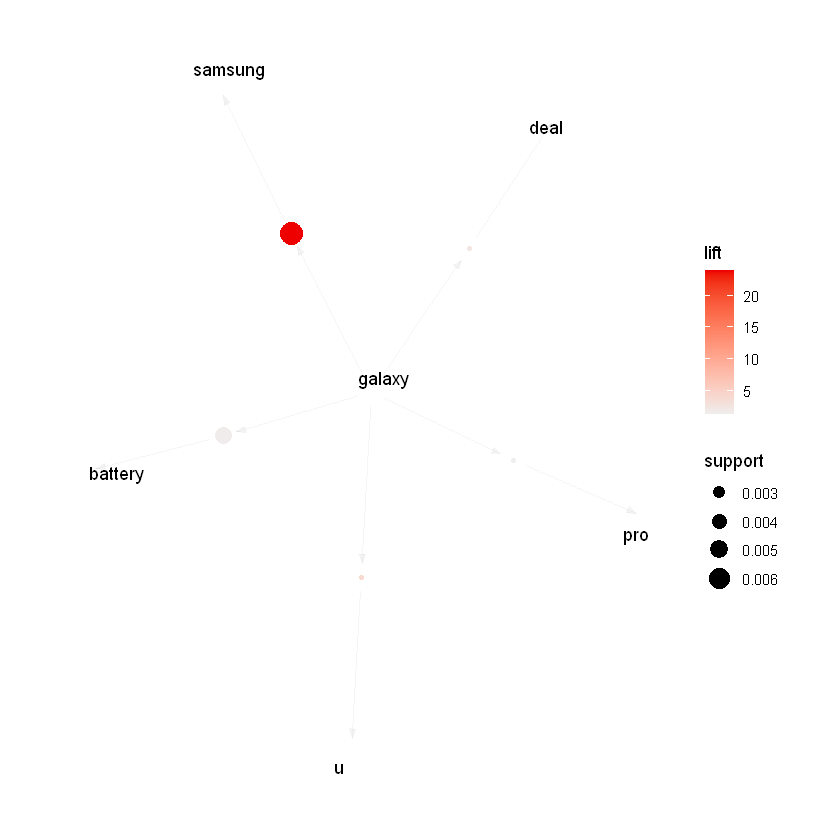

In [37]:
rules <- apriori(data=data,parameter = list(supp=.001, conf=.01, minlen=2),
                     appearance = list(default="rhs", lhs="galaxy"),
                     control=list(verbose=FALSE))
subrules <- head(sort(rules, by="lift"))
plot(subrules,method = "graph")

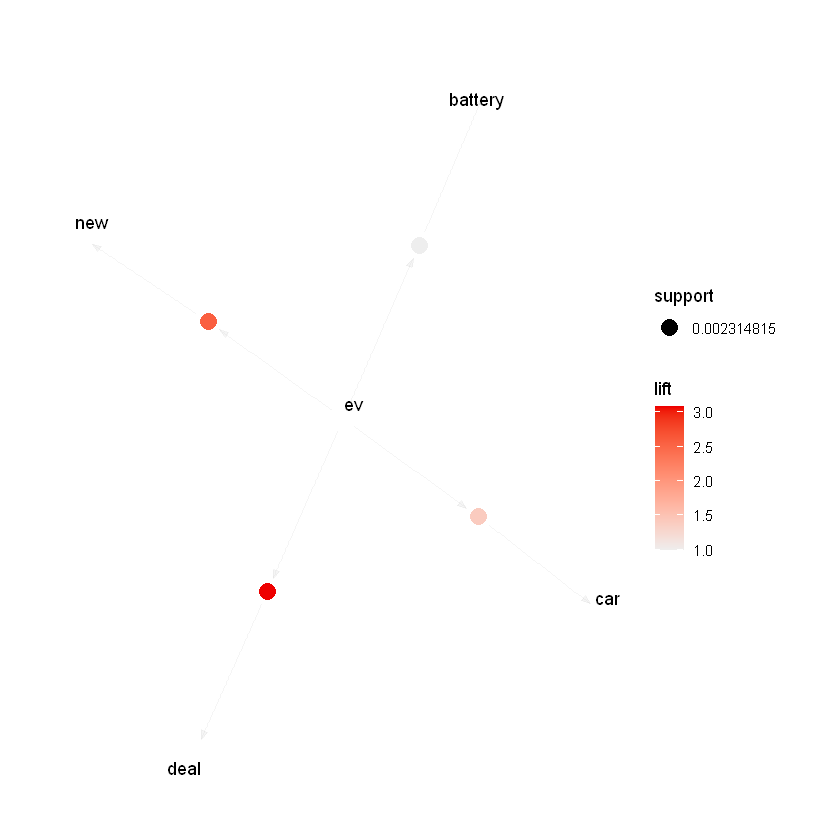

In [39]:
rules <- apriori(data=data,parameter = list(supp=.001, conf=.01, minlen=2),
                     appearance = list(default="rhs", lhs="ev"),
                     control=list(verbose=FALSE))
subrules <- head(sort(rules, by="lift"))
plot(subrules,method = "graph")                                         